<a href="https://colab.research.google.com/github/IshanaySharma/Machine_learning_projects/blob/main/MNIST_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train = x_train[:5000,:,:]# Shortening the dataset
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [7]:
print(y_train[:10])
print(y_test[:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


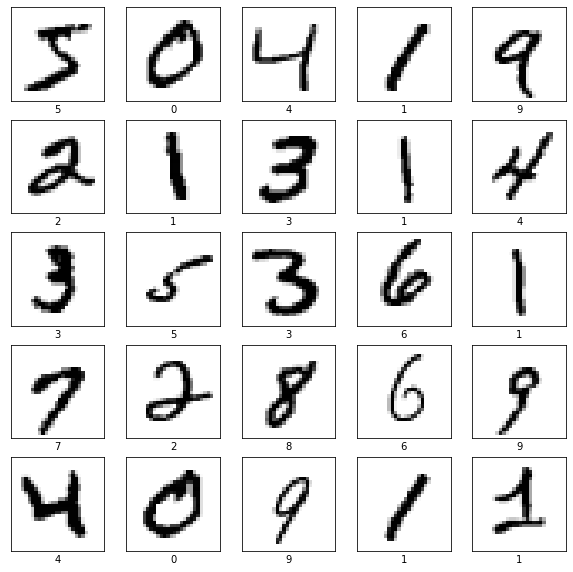

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

plt.show()

In [9]:
#Reshaping the data
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

#Normalising the data
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


In [10]:
#Model 1
#Building the model with dropout layer (it drops some amount of values from the layer)
m1 = Sequential()
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1))) #Strides is the number pixels shifted to the right or left
m1.add(MaxPooling2D(pool_size=(2,2),strides=1))
m1.add(Dropout(0.2))
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1))) 
m1.add(MaxPooling2D(pool_size=(2,2),strides=1))
m1.add(Dropout(0.2))
m1.add(Flatten()) #Flattening the previous layers into 1 single layer
m1.add(Dense(128,activation='relu'))
m1.add(Dense(10,activation='softmax')) # softmax since multiclass classification is being done

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [19]:
h1 = m1.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
157/157 [==============================] - 31s 200ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0832 - val_accuracy: 0.9750
Epoch 2/5
157/157 [==============================] - 31s 199ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.0992 - val_accuracy: 0.9720
Epoch 3/5
157/157 [==============================] - 31s 199ms/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.1176 - val_accuracy: 0.9640
Epoch 4/5
157/157 [==============================] - 31s 198ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0737 - val_accuracy: 0.9790
Epoch 5/5
157/157 [==============================] - 31s 198ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0657 - val_accuracy: 0.9800


In [14]:
r1= pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,0.389392,0.8778,0.131220,0.959,0
1,0.095570,0.9716,0.107586,0.964,1
2,0.057827,0.9804,0.086844,0.971,2
3,0.033609,0.9876,0.080265,0.966,3
4,0.021794,0.9922,0.089635,0.966,4


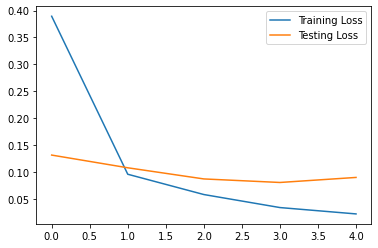

In [15]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

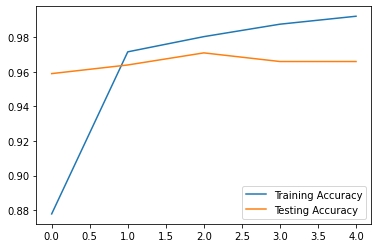

In [16]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [17]:
y_pred = m1.predict(x_test)
print(y_pred)

[[8.8993666e-08 1.5770130e-11 6.8942501e-07 ... 9.9998331e-01
  2.1564356e-10 2.0651567e-07]
 [6.6526539e-08 1.8192583e-04 9.9979430e-01 ... 4.6512060e-08
  2.0543467e-07 1.6656449e-11]
 [6.5944718e-08 9.9996519e-01 2.3975666e-05 ... 8.4182821e-06
  3.6003135e-07 4.3363404e-08]
 ...
 [9.9999952e-01 4.5538460e-14 3.6655510e-07 ... 5.5308713e-12
  1.9272992e-08 1.3639247e-07]
 [9.0864216e-10 2.1858853e-09 5.7785167e-07 ... 2.0647994e-09
  9.9999917e-01 2.8802143e-07]
 [4.1213279e-06 4.1155244e-09 4.3812118e-09 ... 1.3045689e-02
  6.4707497e-06 9.8631269e-01]]


In [18]:
y_pred1 = [np.argmax(i) for i in y_pred]
print(y_pred1)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 2, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [20]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   2   0   0]
 [  1   0   0 104   0   2   0   0   0   0]
 [  0   0   0   0 103   0   1   0   2   4]
 [  0   0   0   0   0  81   1   0   4   1]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   1   1   0   1   0  95   0   1]
 [  0   0   2   1   0   0   0   2  84   0]
 [  0   0   0   0   0   1   0   0   2  91]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       1.00      1.00      1.00       126
           2       0.97      0.98      0.98       116
           3       0.98      0.97      0.98       107
           4       1.00      0.94      0.97       110
           5       0.95      0.93      0.94        87
           6       0.97      0.98      0.97        87
           7       0.96      0.96      0.96        99
           8       0.91      0.94      0.93        89
           9       0.94     

In [21]:
# Model 2 - Data Augmentation, callbacks and Multi-column labels
# If model is using Label encoded categorical variables(multiple columns as labels) in y_train and y_test , then loss function used is categorical_crossentropy
# If model is using Non Label encoded categorical variables(single column as labels) in y_train and y_test , then loss function used is sparse_categorical_crossentropy
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [22]:
print(y_train1[:5])
# previous y_train ->[5 0 4 1 9]
# new y_train
# [0 0 0 0 0 1 0 0 0 0]
# [1 0 0 0 0 0 0 0 0 0]
# [0 0 0 0 1 0 0 0 0 0]
# [0 1 0 0 0 0 0 0 0 0]
# [0 0 0 0 0 0 0 0 0 1]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [23]:
print(y_test1[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
#EarlyStopping Callback prevents model in proceeding with further iterations of epochs if the val_loss is no longer reducing

In [25]:
callbacks = [EarlyStopping(monitor='val_loss',patience=5)] # For 5 epochs if val_loss is not decreasing the model will no longer continue

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_generator = ImageDataGenerator(rescale=1/255,zoom_range=0.3, horizontal_flip=True,
                                     rotation_range=45, vertical_flip=True)
test_generator = ImageDataGenerator(rescale=True)

In [28]:
train_data = train_generator.flow(x_train,y_train,batch_size=64,shuffle=False)
test_data = train_generator.flow(x_test,y_test,batch_size=64,shuffle=False)

In [29]:
m2 = Sequential()
m2.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1),padding='same')) #Strides is the number pixels shifted to the right or left
m2.add(MaxPooling2D(pool_size=(2,2),strides=1))
m2.add(Dropout(0.2))
m2.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1),padding='same')) 
m2.add(MaxPooling2D(pool_size=(2,2),strides=1))
m2.add(Dropout(0.2))
m2.add(Flatten()) #Flattening the previous layers into 1 single layer
m2.add(Dense(128,activation='relu'))
m2.add(Dense(10,activation='softmax')) # softmax since multiclass classification is being done

m2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h2 = m2.fit_generator(train_data,validation_data=test_data,epochs=5,shuffle=False,callbacks=callbacks)

In [ ]:
r2= pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

In [ ]:
plt.plot(r2['Epochs'],r2['loss'],label='Training Loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(r2['Epochs'],r2['accuracy'],label='Training Accuracy')
plt.plot(r2['Epochs'],r2['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = m2.predict(x_test)
print(y_pred)

In [ ]:
y_pred1 = [np.argmax(i) for i in y_pred]
print(y_pred1)

In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))